In [1]:
#Xic+ -> Xi0 pi pi pi
#Xi0 -> Lambda0 pi0
#Lambda0 -> p pi-

from root_pandas import read_root
import ROOT
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
%matplotlib inline

signalfile = '/belle2work/harsikad/ntuples_Signal_630K.root' 
ccbar = '/belle2work/harsikad/harshika_CCbarBkg1.root'
uubar = '/belle2work/harsikad/harshika_UUbarBkg1.root'
ddbar = '/belle2work/harsikad/harshika_DDbarBkg1.root'
ssbar = '/belle2work/harsikad/harshika_SSbarBkg1.root'
mixed = '/belle2work/harsikad/harshika_MixedBkg1.root'
charged = '/belle2work/harsikad/harshika_ChargedBkg1.root'

mycols = ['xic_isSignal','xic_M','xi_mcDecayVertexFromIPDistance','xi_significanceOfDistance','xi_ErrM','xic_flightTime','xic_flightTimeErr','xic_mcFlightTime']

df = read_root(signalfile, key="xic_tree", columns=mycols)
df_ccbar = read_root(ccbar, key="xic_tree", columns=mycols)
df_uubar = read_root(uubar, key="xic_tree", columns=mycols)
df_ddbar = read_root(ddbar, key="xic_tree", columns=mycols)
df_ssbar = read_root(ssbar, key="xic_tree", columns=mycols)
df_mixed = read_root(mixed, key="xic_tree", columns=mycols)
df_charged = read_root(charged, key="xic_tree", columns=mycols)      


Welcome to JupyROOT 6.24/00


In [2]:
#Calculate optimal value to apply cut (>)

def optimalCut(var):
    

    signal = '(xic_isSignal==1)'
    cuts = 'xic_M >2.3 & xic_M<2.7'

    # define a numpy array from the "M" column in the dataframe
    #run over new MC
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

    myrange=(min(nptrue),max(nptrue))

    signal_without_cuts = len(nptrue)
    bkg_without_cuts = len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed)
    
    mycolor = 0
    testvalue = min(nptrue)
    mytestvalue=[]
    mytotal=[]

    for i in range(125):
        cuts = f"xic_M >2.3 & xic_M<2.7 & {var} > {testvalue}"

        nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
        np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

        signal_efficiency = (len(nptrue))/signal_without_cuts
        background_rejection = 1-((len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed))/bkg_without_cuts)
        total=signal_efficiency+background_rejection

        mytestvalue.append(testvalue)
        mytotal.append(total)

        testvalue+=((max(nptrue)-min(nptrue))/125)
        mycolor+=0.0072


    print(var+": "+str(max(mytotal)))
    print(mytestvalue[mytotal.index(max(mytotal))])
#CALCULATE OPTIMAL CUT VALUE AND PRINT

In [3]:
#Calculate optimal value to apply cut (<)

def optimalCutLess(var):
    

    signal = '(xic_isSignal==1)'
    cuts = 'xic_M >2.3 & xic_M<2.7'

    # define a numpy array from the "M" column in the dataframe
    #run over new MC
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

    myrange=(min(nptrue),max(nptrue))

    signal_without_cuts = len(nptrue)
    bkg_without_cuts = len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed)

    mycolor = 0
    testvalue = max(nptrue)
    mytestvalue=[]
    mytotal=[]

    for i in range(125):
        cuts = f"xic_M >2.3 & xic_M<2.7 & {var} < {testvalue}"

        nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
        np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

        signal_efficiency = (len(nptrue))/signal_without_cuts
        background_rejection = 1-((len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed))/bkg_without_cuts)
        total=signal_efficiency+background_rejection

        mytestvalue.append(testvalue)
        mytotal.append(total)

        testvalue-=((max(nptrue)-min(nptrue))/125)
        mycolor+=0.0072


    print(var+": "+str(max(mytotal)))
    print(mytestvalue[mytotal.index(max(mytotal))])
#CALCULATE OPTIMAL CUT VALUE AND PRINT

In [4]:
def plotVar(var, var_range, mycuts):
    
    # Make nice looking plots
    plt.rcParams.update({
              'font.size': 20,
              'figure.figsize': (10, 8),
    })


    signal = '(xic_isSignal==1)'
    cuts = mycuts
    nbins=100
    myrange=var_range

    ax = plt.subplot()

    # define a numpy array from the "M" column in the dataframe
    #run over new MC
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

    scale = 1 # scale factor by eye
    wnp_dd = [scale] * len(np_dd)
    wnp_uu = [scale] * len(np_uu)
    wnp_ss = [scale] * len(np_ss)
    wnp_cc = [scale] * len(np_cc)
    wnp_charged = [scale]*len(np_charged)
    wnp_mixed = [scale]*len(np_mixed)
    wnptrue = [scale] * len(nptrue)


    # use the numpy data to create a matplotlib histogram
    ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
            label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)


    plt.xlim(myrange)

    plt.ylabel('Number of Events')
    plt.xlabel(var)
    plt.legend()

    plt.show()

#PLOT A VARIABLE - STANDARD GRAPH

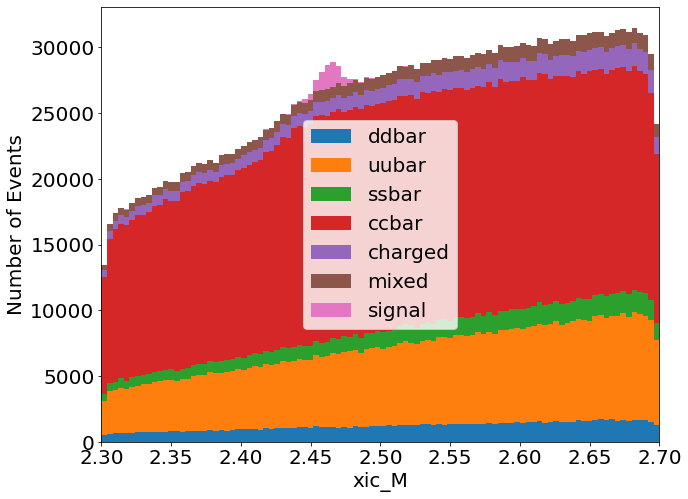

In [5]:
#Before selection criteria
cuts = 'xic_M > 2.3 & xic_M < 2.7'
plotVar('xic_M',(2.3, 2.7), cuts)

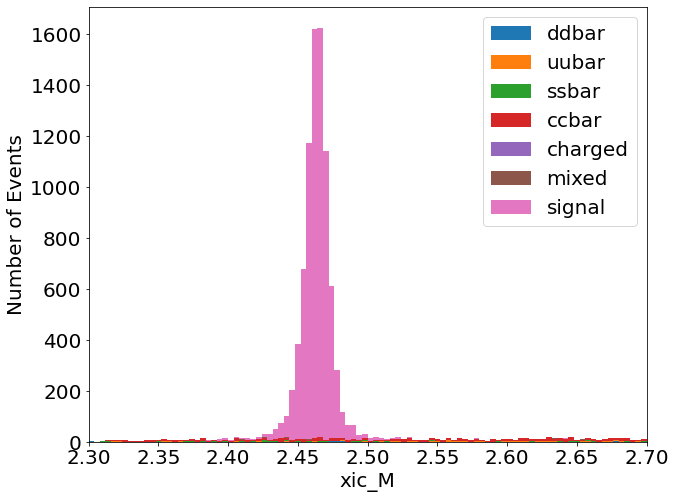

In [6]:
#After selection criteria
cuts = 'xic_M > 2.3 & xic_M < 2.7 & xi_mcDecayVertexFromIPDistance > 0.3617 & xi_significanceOfDistance > 3.46215456 & xi_ErrM < 0.00695869'
plotVar('xic_M',(2.3, 2.7), cuts)

In [7]:
def plotLifetime(var, cuts, myrange, mylabel):
    
    # Make nice looking plots
    plt.rcParams.update({
              'font.size': 20,
              'figure.figsize': (10, 8),
    })

    ax = plt.subplot()
    nbins = 100

    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()*1000
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000

    scale = 1 # scale factor by eye
    wnp_dd = [scale] * len(np_dd)
    wnp_uu = [scale] * len(np_uu)
    wnp_ss = [scale] * len(np_ss)
    wnp_cc = [scale] * len(np_cc)
    wnp_charged = [scale]*len(np_charged)
    wnp_mixed = [scale]*len(np_mixed)
    wnptrue = [scale] * len(nptrue)

    # create histograms
    ydata, bin_edges = np.histogram(nptrue, bins=nbins, range=myrange)
    ax.hist([np_mixed,np_charged,np_uu,np_dd,np_ss,np_cc,nptrue], bins=nbins, range=myrange,
            label=["mixed","charged","uubar","ddbar","ssbar","ccbar","signal"], 
            weights=[wnp_mixed,wnp_charged,wnp_uu,wnp_dd,wnp_ss,wnp_cc,wnptrue], stacked=True)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.errorbar(bin_centers, ydata, yerr = ydata**0.5, fmt='ko', label="Data")

    # set plot features
    #plt.ylim(0.1,2000)
    #plt.yscale("log")
    plt.xlim(myrange)
    plt.xlabel(mylabel)
    plt.legend()
    plt.show()

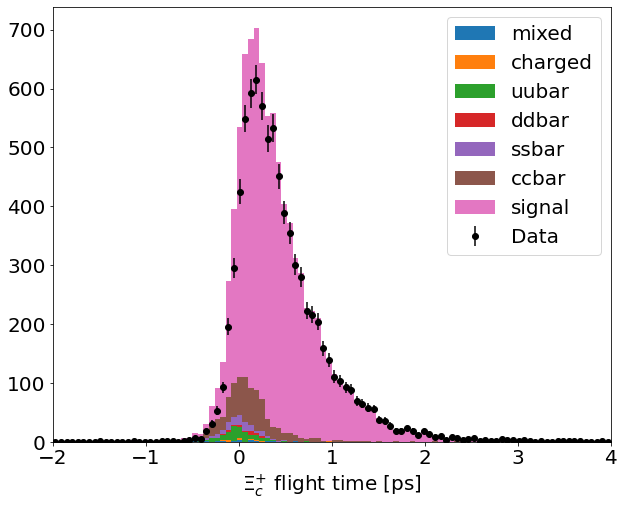

In [8]:
cuts = 'xic_M > 2.3 & xic_M < 2.7 & xi_mcDecayVertexFromIPDistance > 0.3617 & xi_significanceOfDistance > 3.46215456 & xi_ErrM < 0.00695869'
plotLifetime("xic_flightTime",cuts,(-2,4), r'$\Xi_{c}^{+}$ flight time [ps]')

In [9]:
def plotLogLifetime(var, cuts, myrange, mylabel):
    
    # Make nice looking plots
    plt.rcParams.update({
              'font.size': 20,
              'figure.figsize': (10, 8),
    })

    ax = plt.subplot()
    nbins = 100

    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()*1000
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000

    scale = 1 # scale factor by eye
    wnp_dd = [scale] * len(np_dd)
    wnp_uu = [scale] * len(np_uu)
    wnp_ss = [scale] * len(np_ss)
    wnp_cc = [scale] * len(np_cc)
    wnp_charged = [scale]*len(np_charged)
    wnp_mixed = [scale]*len(np_mixed)
    wnptrue = [scale] * len(nptrue)

    # create histograms
    ydata, bin_edges = np.histogram(nptrue, bins=nbins, range=myrange)
    ax.hist([np_mixed,np_charged,np_uu,np_dd,np_ss,np_cc,nptrue], bins=nbins, range=myrange,
            label=["mixed","charged","uubar","ddbar","ssbar","ccbar","signal"], 
            weights=[wnp_mixed,wnp_charged,wnp_uu,wnp_dd,wnp_ss,wnp_cc,wnptrue], stacked=True)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.errorbar(bin_centers, ydata, yerr = ydata**0.5, fmt='ko', label="Data")

    # set plot features
    #plt.ylim(0.1,2000)
    plt.yscale("log")
    plt.xlim(myrange)
    plt.xlabel(mylabel)
    plt.legend()
    plt.show()

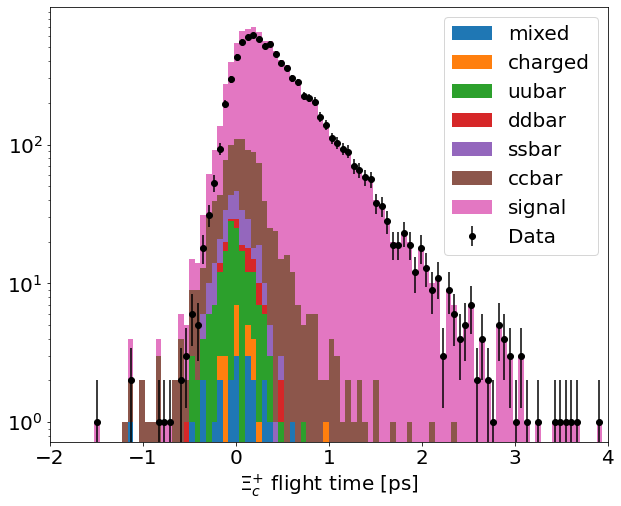

In [10]:
plotLogLifetime("xic_flightTime",cuts,(-2,4), r'$\Xi_{c}^{+}$ flight time [ps]')

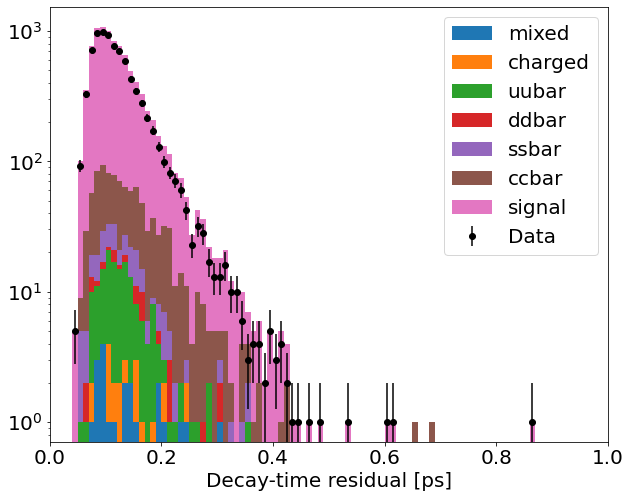

In [11]:
plotLogLifetime("xic_flightTimeErr",cuts,(0,1), 'Decay-time residual [ps]')

In [12]:
def plotLogDiff(var, var2, cuts, myrange, mylabel):
    
    # Make nice looking plots
    plt.rcParams.update({
              'font.size': 20,
              'figure.figsize': (10, 8),
    })
    
    nbins = 100

    ax = plt.subplot()

    # define a numpy array from the "M" column in the dataframe
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()*1000 - df.query(cuts+'and xic_isSignal==1')[var2].to_numpy()*1000
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000 - df_ddbar.query(cuts+' and not xic_isSignal==1')[var2].to_numpy()*1000
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000 - df_uubar.query(cuts+' and not xic_isSignal==1')[var2].to_numpy()*1000
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000 - df_ssbar.query(cuts+' and not xic_isSignal==1')[var2].to_numpy()*1000
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000 - df_ccbar.query(cuts+' and not xic_isSignal==1')[var2].to_numpy()*1000
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000 - df_charged.query(cuts+' and not xic_isSignal==1')[var2].to_numpy()*1000
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()*1000 - df_mixed.query(cuts+' and not xic_isSignal==1')[var2].to_numpy()*1000

    scale = 1 # scale factor by eye
    wnp_dd = [scale] * len(np_dd)
    wnp_uu = [scale] * len(np_uu)
    wnp_ss = [scale] * len(np_ss)
    wnp_cc = [scale] * len(np_cc)
    wnp_charged = [scale]*len(np_charged)
    wnp_mixed = [scale]*len(np_mixed)
    wnptrue = [scale] * len(nptrue)

    # use the numpy histogram to create a matplotlib histogram
    ax.hist([np_mixed,np_charged,np_uu,np_dd,np_ss,np_cc,nptrue], bins=nbins, range=myrange,
            label=["mixed","charged","uubar","ddbar","ssbar","ccbar","signal"], 
            weights=[wnp_mixed,wnp_charged,wnp_uu,wnp_dd,wnp_ss,wnp_cc,wnptrue], stacked=True)

    # set plot features
    #plt.ylim(0.1,2000)
    plt.yscale("log")
    plt.xlim(myrange)
    plt.xlabel(mylabel)
    plt.legend()
    plt.show()

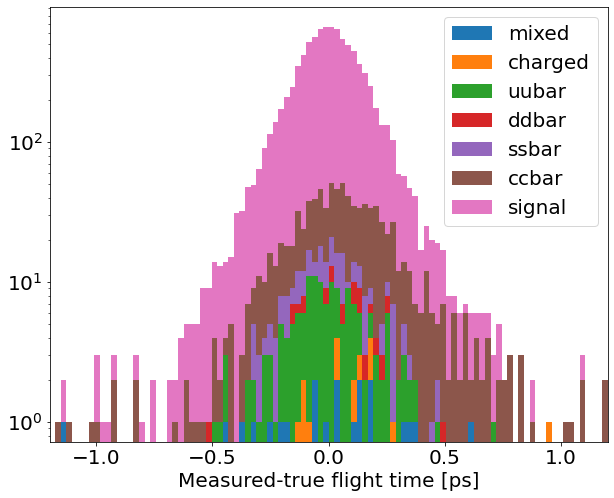

In [13]:
plotLogDiff("xic_flightTime","xic_mcFlightTime",cuts,(-1.2,1.2),'Measured-true flight time [ps]')

In [14]:
xicsdbnds = "((xic_M > 2.35 & xic_M < 2.39) or (xic_M > 2.52 & xic_M < 2.56))"
xicsdbndlow = "(xic_M > 2.35 & xic_M < 2.39)"
xicsdbndhigh = "(xic_M > 2.52 & xic_M < 2.56)"
xicmassrange = "xic_M > 2.435 & xic_M < 2.495"

In [17]:
def plotLifetimeCompSignal(var, cuts, myrange, mylabel):
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4)
    
    nbins = 100
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1]) 
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    npcc = np.array(df_ccbar.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npccsblow = np.array(df_ccbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npccsbhigh = np.array(df_ccbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npccsb = np.array(df_ccbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    scale = 1 # optional scale factor
    wcc = [scale] * len(npcc)
    wccsblow = [scale] * len(npccsblow)
    wccsbhigh = [scale] * len(npccsbhigh)
    wccsb = [scale/2] * len(npccsb)

    ycc, bin_edges = np.histogram(npcc, bins=nbins, range=myrange, weights=wcc)
    yccsblow, bin_edges = np.histogram(npccsblow, bins=nbins, range=myrange,  weights=wccsblow)
    yccsbhigh, bin_edges = np.histogram(npccsbhigh, bins=nbins, range=myrange,  weights=wccsbhigh)
    yccsb, bin_edges = np.histogram(npccsb, bins=nbins, range=myrange,  weights=wccsb)

    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax0.errorbar(bin_centers, ycc, yerr = ycc**0.5, fmt='kp', label="Signal region")
    ax0.errorbar(bin_centers, yccsblow, yerr = yccsblow**0.5, fmt='gp', label="Low sideband")
    ax0.errorbar(bin_centers, yccsbhigh, yerr = yccsbhigh**0.5, fmt='bp', label="High sideband")
    ax0.errorbar(bin_centers, yccsb, yerr = yccsb**0.5, fmt='rp', label="Sidebands")

    # set plot features
    #ax0.set_ylim(0.1,2e3)
    #ax0.set_yscale("log")
    ax0.set_xlim(myrange)
    ax0.set_xlabel(mylabel)
    ax0.legend()

    yccerr = ycc**0.5
    X = np.ma.masked_equal(yccerr,0)
    ysbpull = (ycc-yccsb)/X
    ax1.hist(bin_edges[:-1], bin_edges, weights=ysbpull, histtype='step', color='Black')
    ysblhpull = (yccsbhigh-yccsblow)/X
    ax1.hist(bin_edges[:-1], bin_edges, weights=ysblhpull, histtype='step', color='Red')

    # set plot features
    ax1.set_xlim(myrange)
    plt.axhline(y=0.0, color='k', linestyle='-', linewidth=0.5)
    plt.show()

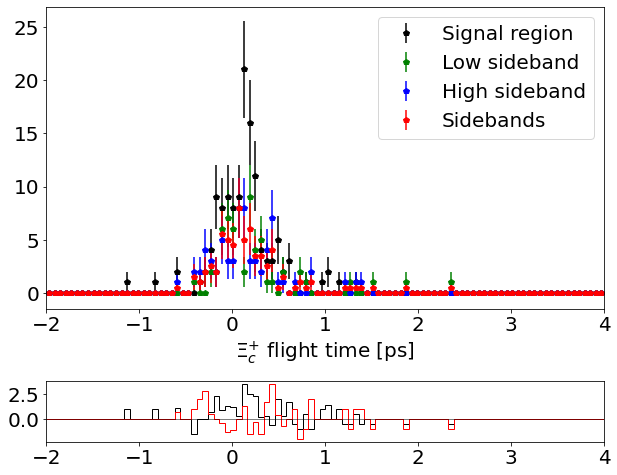

In [19]:
plotLifetimeCompSignal("xic_flightTime",cuts,(-2,4),r'$\Xi_{c}^{+}$ flight time [ps]')

In [24]:
def plotLogLifetimeCompSignal(var, cuts, myrange, mylabel):
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4)
    
    nbins = 100
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1]) 
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    npcc = np.array(df_ccbar.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npccsblow = np.array(df_ccbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npccsbhigh = np.array(df_ccbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npccsb = np.array(df_ccbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    scale = 1 # optional scale factor
    wcc = [scale] * len(npcc)
    wccsblow = [scale] * len(npccsblow)
    wccsbhigh = [scale] * len(npccsbhigh)
    wccsb = [scale/2] * len(npccsb)

    ycc, bin_edges = np.histogram(npcc, bins=nbins, range=myrange, weights=wcc)
    yccsblow, bin_edges = np.histogram(npccsblow, bins=nbins, range=myrange,  weights=wccsblow)
    yccsbhigh, bin_edges = np.histogram(npccsbhigh, bins=nbins, range=myrange,  weights=wccsbhigh)
    yccsb, bin_edges = np.histogram(npccsb, bins=nbins, range=myrange,  weights=wccsb)

    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax0.errorbar(bin_centers, ycc, yerr = ycc**0.5, fmt='kp', label="Signal region")
    ax0.errorbar(bin_centers, yccsblow, yerr = yccsblow**0.5, fmt='gp', label="Low sideband")
    ax0.errorbar(bin_centers, yccsbhigh, yerr = yccsbhigh**0.5, fmt='bp', label="High sideband")
    ax0.errorbar(bin_centers, yccsb, yerr = yccsb**0.5, fmt='rp', label="Sidebands")

    # set plot features
    #ax0.set_ylim(0.1,2e3)
    ax0.set_yscale("log")
    ax0.set_xlim(myrange)
    ax0.set_xlabel(mylabel)
    ax0.legend()

    yccerr = ycc**0.5
    X = np.ma.masked_equal(yccerr,0)
    ysbpull = (ycc-yccsb)/X
    ax1.hist(bin_edges[:-1], bin_edges, weights=ysbpull, histtype='step', color='Black')
    ysblhpull = (yccsbhigh-yccsblow)/X
    ax1.hist(bin_edges[:-1], bin_edges, weights=ysblhpull, histtype='step', color='Red')

    # set plot features
    ax1.set_xlim(myrange)
    plt.axhline(y=0.0, color='k', linestyle='-', linewidth=0.5)
    plt.show()

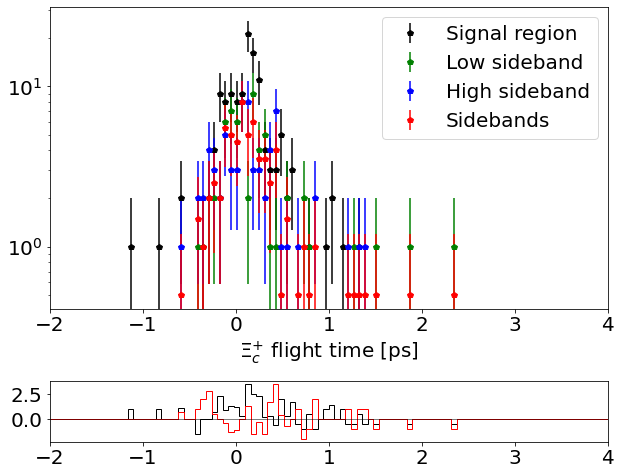

In [25]:
plotLogLifetimeCompSignal("xic_flightTime",cuts,(-2,4),r'$\Xi_{c}^{+}$ flight time [ps]')

In [31]:
def plotLifetimeCompUDS(var, cuts, myrange, mylabel):
    nbins = 100
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4)

    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1]) 
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    npmi = np.array(df_mixed.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npmisblow = np.array(df_mixed.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npmisbhigh = np.array(df_mixed.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npmisb = np.array(df_mixed.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    npch = np.array(df_charged.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npchsblow = np.array(df_charged.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npchsbhigh = np.array(df_charged.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npchsb = np.array(df_charged.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    npuu = np.array(df_uubar.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npuusblow = np.array(df_uubar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npuusbhigh = np.array(df_uubar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npuusb = np.array(df_uubar.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    npdd = np.array(df_ddbar.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npddsblow = np.array(df_ddbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npddsbhigh = np.array(df_ddbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npddsb = np.array(df_ddbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    npss = np.array(df_ssbar.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npsssblow = np.array(df_ssbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npsssbhigh = np.array(df_ssbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npsssb = np.array(df_ssbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    npcc = np.concatenate((npmi,npch,npuu,npdd,npss))
    npccsblow = np.concatenate((npmisblow,npchsblow,npuusblow,npddsblow,npsssblow))
    npccsbhigh = np.concatenate((npmisbhigh,npchsbhigh,npuusbhigh,npddsbhigh,npsssbhigh))
    npccsb = np.concatenate((npmisb,npchsb,npuusb,npddsb,npsssb))

    scale = 1 # optional scale factor
    wcc = [scale] * len(npcc)
    wccsblow = [scale] * len(npccsblow)
    wccsbhigh = [scale] * len(npccsbhigh)
    wccsb = [scale/2] * len(npccsb)

    ycc, bin_edges = np.histogram(npcc, bins=nbins, range=myrange, weights=wcc)
    yccsblow, bin_edges = np.histogram(npccsblow, bins=nbins, range=myrange,  weights=wccsblow)
    yccsbhigh, bin_edges = np.histogram(npccsbhigh, bins=nbins, range=myrange,  weights=wccsbhigh)
    yccsb, bin_edges = np.histogram(npccsb, bins=nbins, range=myrange,  weights=wccsb)

    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax0.errorbar(bin_centers, ycc, yerr = ycc**0.5, fmt='kp', label="Signal region")
    ax0.errorbar(bin_centers, yccsblow, yerr = yccsblow**0.5, fmt='gp', label="Low sideband")
    ax0.errorbar(bin_centers, yccsbhigh, yerr = yccsbhigh**0.5, fmt='bp', label="High sideband")
    ax0.errorbar(bin_centers, yccsb, yerr = yccsb**0.5, fmt='rp', label="Sidebands")

    # set plot features
    #ax0.set_ylim(0.1,2e3)
    #ax0.set_yscale("log")
    ax0.set_xlim(myrange)
    ax0.set_xlabel(mylabel)
    ax0.legend()

    yccerr = ycc**0.5
    X = np.ma.masked_equal(yccerr,0)
    ysbpull = (ycc-yccsb)/X
    ax1.hist(bin_edges[:-1], bin_edges, weights=ysbpull, histtype='step', color='Black')
    ysblhpull = (yccsbhigh-yccsblow)/X
    ax1.hist(bin_edges[:-1], bin_edges, weights=ysblhpull, histtype='step', color='Red')

    # set plot features
    ax1.set_xlim(myrange)
    plt.axhline(y=0.0, color='k', linestyle='-', linewidth=0.5)
    plt.show()

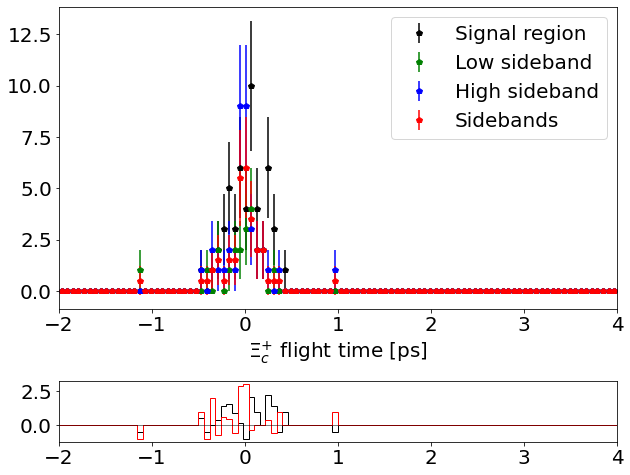

In [32]:
plotLifetimeCompUDS("xic_flightTime",cuts,(-2,4),r'$\Xi_{c}^{+}$ flight time [ps]')

In [33]:
def plotLogLifetimeCompUDS(var, cuts, myrange, mylabel):
    nbins = 100
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4)

    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1]) 
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    npmi = np.array(df_mixed.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npmisblow = np.array(df_mixed.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npmisbhigh = np.array(df_mixed.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npmisb = np.array(df_mixed.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    npch = np.array(df_charged.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npchsblow = np.array(df_charged.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npchsbhigh = np.array(df_charged.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npchsb = np.array(df_charged.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    npuu = np.array(df_uubar.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npuusblow = np.array(df_uubar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npuusbhigh = np.array(df_uubar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npuusb = np.array(df_uubar.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    npdd = np.array(df_ddbar.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npddsblow = np.array(df_ddbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npddsbhigh = np.array(df_ddbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npddsb = np.array(df_ddbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    npss = np.array(df_ssbar.query(cuts+' and not xic_isSignal==1 and '+xicmassrange).xic_flightTime.to_numpy()*1000)
    npsssblow = np.array(df_ssbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndlow).xic_flightTime.to_numpy()*1000)
    npsssbhigh = np.array(df_ssbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbndhigh).xic_flightTime.to_numpy()*1000)
    npsssb = np.array(df_ssbar.query(cuts+' and not xic_isSignal==1 and '+xicsdbnds).xic_flightTime.to_numpy()*1000)

    npcc = np.concatenate((npmi,npch,npuu,npdd,npss))
    npccsblow = np.concatenate((npmisblow,npchsblow,npuusblow,npddsblow,npsssblow))
    npccsbhigh = np.concatenate((npmisbhigh,npchsbhigh,npuusbhigh,npddsbhigh,npsssbhigh))
    npccsb = np.concatenate((npmisb,npchsb,npuusb,npddsb,npsssb))

    scale = 1 # optional scale factor
    wcc = [scale] * len(npcc)
    wccsblow = [scale] * len(npccsblow)
    wccsbhigh = [scale] * len(npccsbhigh)
    wccsb = [scale/2] * len(npccsb)

    ycc, bin_edges = np.histogram(npcc, bins=nbins, range=myrange, weights=wcc)
    yccsblow, bin_edges = np.histogram(npccsblow, bins=nbins, range=myrange,  weights=wccsblow)
    yccsbhigh, bin_edges = np.histogram(npccsbhigh, bins=nbins, range=myrange,  weights=wccsbhigh)
    yccsb, bin_edges = np.histogram(npccsb, bins=nbins, range=myrange,  weights=wccsb)

    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax0.errorbar(bin_centers, ycc, yerr = ycc**0.5, fmt='kp', label="Signal region")
    ax0.errorbar(bin_centers, yccsblow, yerr = yccsblow**0.5, fmt='gp', label="Low sideband")
    ax0.errorbar(bin_centers, yccsbhigh, yerr = yccsbhigh**0.5, fmt='bp', label="High sideband")
    ax0.errorbar(bin_centers, yccsb, yerr = yccsb**0.5, fmt='rp', label="Sidebands")

    # set plot features
    #ax0.set_ylim(0.1,2e3)
    ax0.set_yscale("log")
    ax0.set_xlim(myrange)
    ax0.set_xlabel(mylabel)
    ax0.legend()

    yccerr = ycc**0.5
    X = np.ma.masked_equal(yccerr,0)
    ysbpull = (ycc-yccsb)/X
    ax1.hist(bin_edges[:-1], bin_edges, weights=ysbpull, histtype='step', color='Black')
    ysblhpull = (yccsbhigh-yccsblow)/X
    ax1.hist(bin_edges[:-1], bin_edges, weights=ysblhpull, histtype='step', color='Red')

    # set plot features
    ax1.set_xlim(myrange)
    plt.axhline(y=0.0, color='k', linestyle='-', linewidth=0.5)
    plt.show()

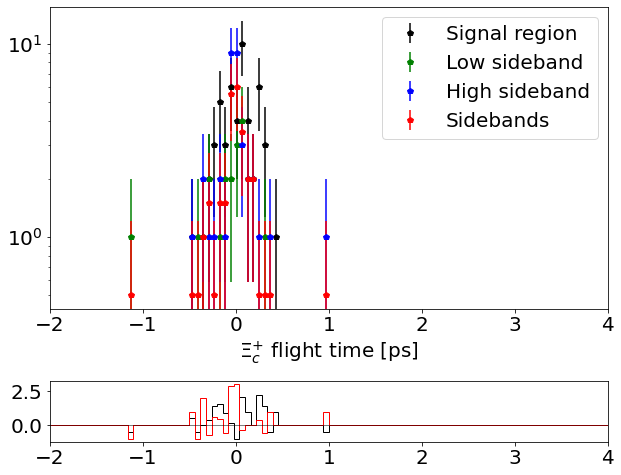

In [34]:
plotLogLifetimeCompUDS("xic_flightTime",cuts,(-2,4),r'$\Xi_{c}^{+}$ flight time [ps]')